<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise5_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# CIFAR10 load
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizasyon

# CNN create for cifar10
def create_cnn_cifar10():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# train model
model_cifar10 = create_cnn_cifar10()
model_cifar10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cifar10.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3531 - loss: 1.7363 - val_accuracy: 0.5636 - val_loss: 1.2248
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5800 - loss: 1.1794 - val_accuracy: 0.6261 - val_loss: 1.0592
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6517 - loss: 0.9906 - val_accuracy: 0.6693 - val_loss: 0.9531
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6931 - loss: 0.8692 - val_accuracy: 0.6825 - val_loss: 0.9086
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7224 - loss: 0.7916 - val_accuracy: 0.6959 - val_loss: 0.8767


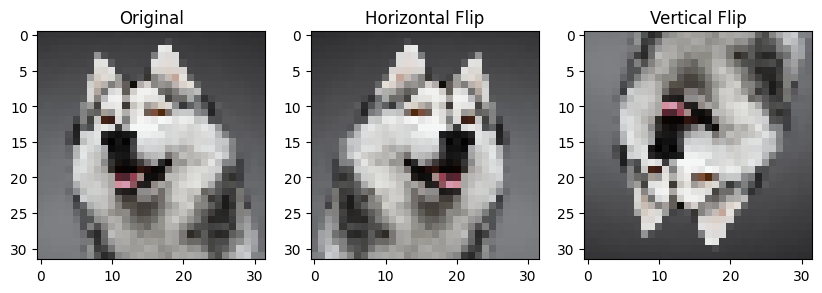

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Original Image Prediction: 5
Horizontal Flip Prediction: 5
Vertical Flip Prediction: 5


In [17]:
# dog.jpg
dog_img = cv2.imread("dog.jpg")
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
dog_img = cv2.resize(dog_img, (32, 32)) / 255.0  #resize and normalize

# Horizontal Flip
dog_img_hf = cv2.flip(dog_img, 1)
# Vertical Flip
dog_img_vf = cv2.flip(dog_img, 0)

# show image
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(dog_img)
axes[0].set_title("Original")
axes[1].imshow(dog_img_hf)
axes[1].set_title("Horizontal Flip")
axes[2].imshow(dog_img_vf)
axes[2].set_title("Vertical Flip")
plt.show()

# prediction
pred_original = np.argmax(model_cifar10.predict(np.expand_dims(dog_img, axis=0)))
pred_hf = np.argmax(model_cifar10.predict(np.expand_dims(dog_img_hf, axis=0)))
pred_vf = np.argmax(model_cifar10.predict(np.expand_dims(dog_img_vf, axis=0)))

print(f"Original Image Prediction: {pred_original}")
print(f"Horizontal Flip Prediction: {pred_hf}")
print(f"Vertical Flip Prediction: {pred_vf}")

In [18]:
# MNIST load
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = np.expand_dims(x_train / 255.0, axis=-1)
x_test = np.expand_dims(x_test / 255.0, axis=-1)

# CNN model for mnist
def create_cnn_mnist():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# train model
model_mnist = create_cnn_mnist()
model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8894 - loss: 0.3535 - val_accuracy: 0.9852 - val_loss: 0.0461
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9905 - val_loss: 0.0293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9914 - val_loss: 0.0252
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9895 - val_loss: 0.0319
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9901 - val_loss: 0.0328


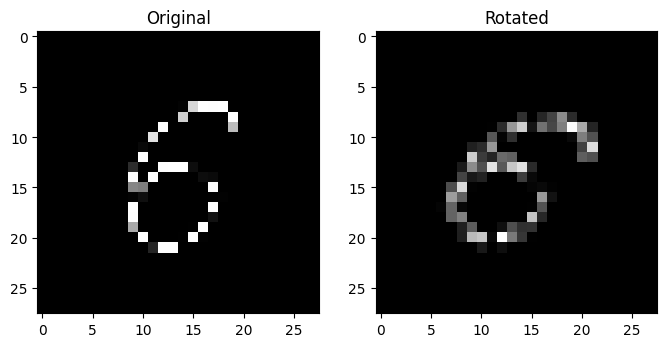

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Original Image Prediction: 5
Rotated Image Prediction: 5


In [21]:
# handwritten6.jpg
img = cv2.imread("handwritten6.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28)) / 255.0
img = np.expand_dims(img, axis=-1)

# Rotation Augmentation
datagen = ImageDataGenerator(rotation_range=70) # degree 70
rotated_img = next(datagen.flow(np.expand_dims(img, axis=0), batch_size=1))[0]

# show Image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img.squeeze(), cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(rotated_img.squeeze(), cmap="gray")
axes[1].set_title("Rotated")
plt.show()

# model train and prediction
pred_original = np.argmax(model_mnist.predict(np.expand_dims(img, axis=0)))
pred_rotated = np.argmax(model_mnist.predict(np.expand_dims(rotated_img, axis=0)))

print(f"Original Image Prediction: {pred_original}")
print(f"Rotated Image Prediction: {pred_rotated}")